In [ ]:
import numpy as np

def l2_regularization(weights, lambda_reg):
    """
    Calculate L2 regularization term for a given set of weights.

    Parameters:
    - weights: numpy array representing the model weights
    - lambda_reg: regularization strength

    Returns:
    - l2_term: L2 regularization term
    """
    return 0.5 * lambda_reg * np.sum(weights**2)

def linear_regression_with_l2(X, y, learning_rate, epochs, lambda_reg):
    """
    Train a linear regression model with L2 regularization using gradient descent.

    Parameters:
    - X: Input features (numpy array)
    - y: Target values (numpy array)
    - learning_rate: Learning rate for gradient descent
    - epochs: Number of training epochs
    - lambda_reg: Regularization strength

    Returns:
    - weights: Learned model weights
    - bias: Learned bias term
    """

    # Initialize weights and bias
    num_features = X.shape[1]
    weights = np.zeros(num_features)
    bias = 0

    # Training loop
    for epoch in range(epochs):
        # Forward pass
        predictions = np.dot(X, weights) + bias

        # Compute loss
        error = predictions - y
        loss = np.mean(error**2) + l2_regularization(weights, lambda_reg)

        # Backward pass
        gradient_weights = 2 * np.dot(X.T, error) / len(y) + lambda_reg * weights
        gradient_bias = 2 * np.mean(error)

        # Update weights and bias
        weights -= learning_rate * gradient_weights
        bias -= learning_rate * gradient_bias

        # Print the loss every 100 epochs
        if epoch % 100 == 0:
            print(f'Epoch {epoch}, Loss: {loss}')

    return weights, bias

# Example usage
np.random.seed(42)
X = np.random.rand(100, 2)
y = 2 * X[:, 0] + 3 * X[:, 1] + 0.5 * np.random.randn(100)

learning_rate = 0.01
epochs = 1000
lambda_reg = 0.1

weights, bias = linear_regression_with_l2(X, y, learning_rate, epochs, lambda_reg)

print('Learned Weights:', weights)
print('Learned Bias:', bias)


Epoch 0, Loss: 7.584961310333369
Epoch 100, Loss: 0.8422642402963619
Epoch 200, Loss: 0.7903926426006492
Epoch 300, Loss: 0.7642213206578808
Epoch 400, Loss: 0.7459971693102054
Epoch 500, Loss: 0.733268550904453
Epoch 600, Loss: 0.7243646083868439
Epoch 700, Loss: 0.7181282694934761
Epoch 800, Loss: 0.7137558252182926
Epoch 900, Loss: 0.7106876213094928
Learned Weights: [1.27195744 1.77986145]
Learned Bias: 1.0108712450678166


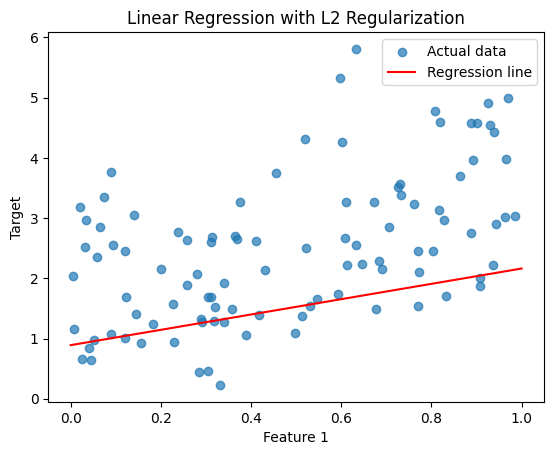

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of the original data
plt.scatter(X[:, 0], y, label='Actual data', alpha=0.7)

# Generate points for the regression line
x_line = np.linspace(0, 1, 100)
y_line = weights[0] * x_line + weights[1] * 0.5  # assuming bias is 0.5 in this case

# Plot the regression line
plt.plot(x_line, y_line, color='red', label='Regression line')

plt.title('Linear Regression with L2 Regularization')
plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.legend()
plt.show()

True
